# Bell Szekeres Solution and Related Solutions of the Einstein Maxwell Equations Barrabes & Hogan
##  Geoff Cope
##  Univeristy of Utah
##  December 22, 2021

https://arxiv.org/abs/gr-qc/0608087

http://213.230.96.51:8090/files/ebooks/Fizika/Griffiths%20J.B.%20Colliding%20plane%20waves%20in%20general%20relativity%20(OUP,%201991)(ISBN%200198532091)(254s)%20PGr%20.pdf

In [2]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [3]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [4]:
u,v,x,y,du,dv,dx,dy,U,V,M = symbols( 'u v x y du dv dx dy U V M' ) 

In [5]:
U = Function('U')(u,v)
U

In [6]:
V = Function('V')(u,v)
V

In [7]:
M = Function('M')(u,v)
M

In [8]:
variables = Matrix( [u,v,x,y] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢x⎥
⎢ ⎥
⎣y⎦

In [9]:
differentials = Matrix( [du,dv,dx,dy] ) 
differentials

⎡du⎤
⎢  ⎥
⎢dv⎥
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎣dy⎦

In [11]:
lineElement = expand( -exp(-U) * ( exp(V)*dx**2 + exp(-V)*dy**2 ) + 2*exp(-M)*du*dv ) 
lineElement

In [12]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡            -M(u, v)                                           ⎤
⎢    0      ℯ                   0                    0          ⎥
⎢                                                               ⎥
⎢ -M(u, v)                                                      ⎥
⎢ℯ              0               0                    0          ⎥
⎢                                                               ⎥
⎢                        -U(u, v)  V(u, v)                      ⎥
⎢    0          0      -ℯ        ⋅ℯ                  0          ⎥
⎢                                                               ⎥
⎢                                             -U(u, v)  -V(u, v)⎥
⎣    0          0               0           -ℯ        ⋅ℯ        ⎦

In [13]:
import sympy

In [14]:
m = sympy.Array(g)
m

⎡            -M(u, v)                                           ⎤
⎢    0      ℯ                   0                    0          ⎥
⎢                                                               ⎥
⎢ -M(u, v)                                                      ⎥
⎢ℯ              0               0                    0          ⎥
⎢                                                               ⎥
⎢                        -U(u, v)  V(u, v)                      ⎥
⎢    0          0      -ℯ        ⋅ℯ                  0          ⎥
⎢                                                               ⎥
⎢                                             -U(u, v)  -V(u, v)⎥
⎣    0          0               0           -ℯ        ⋅ℯ        ⎦

In [15]:
from einsteinpy.symbolic import *

In [16]:
syms = sympy.symbols("u v x y")
u,v,x,y = syms

In [17]:
metric = MetricTensor(m,syms)

In [19]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢⎡ ∂                                                                                        
⎢⎢-──(M(u, v))  0                              0                                            
⎢⎢ ∂u                                                                                       
⎢⎢                                                                                          
⎢⎢     0        0                              0                                            
⎢⎢                                                                                          
⎢⎢                 ⎛  ∂             ∂          ⎞  M(u, v) - U(u, v) + V(u, v)               
⎢⎢                 ⎜- ──(U(u, v)) + ──(V(u, v))⎟⋅ℯ                                          
⎢⎢                 ⎝  ∂v            ∂v         ⎠                                            
⎢⎢     0        0  ───────────────────────────────────────────────────

In [20]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡                                             2                               2             
⎢                                ⎛∂          ⎞                   ⎛∂          ⎞            ∂ 
⎢                                ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟            ──
⎢      ∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠            ∂u
⎢      ──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────         - ──
⎢      ∂u          ∂u                  2            2                  2                    
⎢                                                 ∂u                                        
⎢                                                                                           
⎢                                                                                           
⎢  ∂           ∂             ∂           ∂                                                  
⎢  ──(U(u, v))⋅──(U(u, v))   ──(V(u, v))⋅──(V(u, v))      2           

In [21]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                       2                               2                   
⎢                          ⎛∂          ⎞                   ⎛∂          ⎞                    
⎢                          ⎜──(U(u, v))⎟      2            ⎜──(V(u, v))⎟                    
⎢∂           ∂             ⎝∂u         ⎠     ∂             ⎝∂u         ⎠                    
⎢──(M(u, v))⋅──(U(u, v)) - ────────────── + ───(U(u, v)) - ──────────────                1.0
⎢∂u          ∂u                  2            2                  2                          
⎢                                           ∂u                                              
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                               2                     

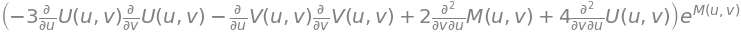

In [22]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [23]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [24]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [ ]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()